In [29]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
%matplotlib inline

In [33]:
bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
nemolon=bathy.variables['nav_lon'][::10,::10]
nemolat=bathy.variables['nav_lat'][::10,::10]
bathy=bathy.variables['Bathymetry'][::10,::10]

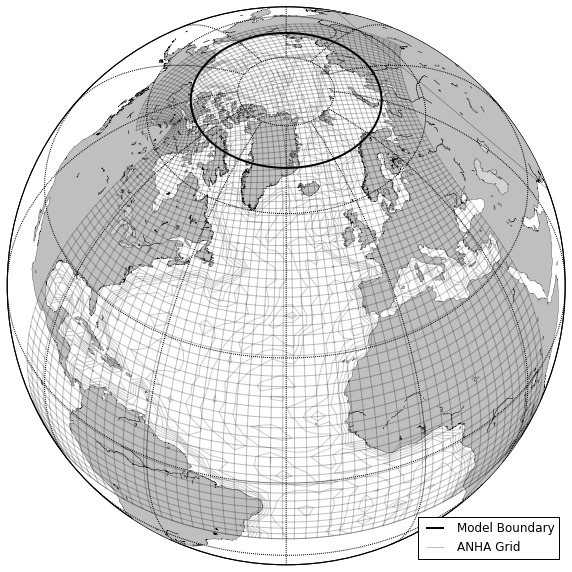

In [74]:
fig = plt.figure(figsize=(10,10))
map = Basemap(projection='ortho',lat_0=45,lon_0=-30,resolution='l')
# draw coastlines, country boundaries, fill continents.
map.drawcoastlines(linewidth=0.25)
map.fillcontinents(color='0.75',lake_color='lightgrey')
# draw the edge of the map projection region (the projection limb)
map.drawmapboundary(fill_color='white')
# draw lat/lon grid lines every 30 degrees.
map.drawmeridians(np.arange(0,360,30))
map.drawparallels(np.arange(-90,90,30))
# compute native map projection coordinates of lat/lon grid.
n_lon,n_lat = map(nemolon,nemolat)
map.plot(n_lon,n_lat,n_lon.T,n_lat.T,c='black',alpha=0.25)
map.contour(n_lon,n_lat,bathy,linewidth=0.075,colors='black',alpha=0.2)

bclon = np.linspace(0,360,360)
bclat = np.ones_like(bclon)*70
bc_lon,bc_lat = map(bclon,bclat)
map.plot(bc_lon,bc_lat,c='black',lw=2,label="Model Boundary")
map.plot(n_lon[0],n_lat[0],c='black',alpha=0.25,label="ANHA Grid")
plt.legend(loc=4)
plt.show()